# 4. Scipy로 공부하는 확률 변수

## 02장. 정규분포와 통계량 분포

## 1. 가우시안 정규분포

In [11]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats

In [2]:
mpl.rcParams["font.family"]
mpl.matplotlib_fname()
import matplotlib.font_manager as fm
font_location = "/Library/Fonts/AppleGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc('font', family=font_name)

AppleGothic


- - -
### 1. 가우시안 정규분포 (Gaussian normal distribution)

- 자연현상에서 나타나는 숫자를 확률 모형으로 모형화 시 가장 많이 사용되는 확률 모형
- 평균과 분산 두개의 모수만으로 정의된다.

In [8]:
%%latex
A random variable X is said to be normally distributed with mean $\mu$ and variance $\sigma^{2}$ if its probability density function (pdf) is $N(x;\mu,\sigma^{2})=\frac{1}{\sqrt[]{2\pi\sigma^{2}}}exp(-\frac{(x-\mu)^{2}}{2\sigma^{2}})$

<IPython.core.display.Latex object>

In [9]:
%%latex
$\frac{1}{\sqrt[]{2\pi\sigma^{2}}}$는 normalize 돕는다.

<IPython.core.display.Latex object>

In [10]:
%%latex
$exp(-\frac{(x-\mu)^{2}}{2\sigma^{2}})$값은 정규분포의 pdf 함수 결과값이 0과 1사이 값이 출력 되도록 돕는다.

<IPython.core.display.Latex object>

In [22]:
%%latex
$x=\mu$일 때 확률 밀도가 최대가 된다.
$x=\infty$나 $x=-\infty$로 다가갈 수록 확률 밀도가 작아진다.

<IPython.core.display.Latex object>

- - -
### 2. Scipy를 사용한 정규 분포의 시뮬레이션
- `sp.stats.norm`, `loc` 평균 설정 `scale`로 표준편차 설정

In [24]:
# 가우시안 정규분포를 따르는 객체 생성하기
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

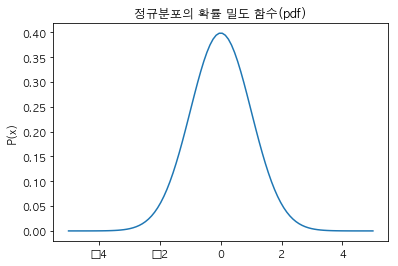

In [25]:
# 평균 0, 표준편차 1을 따르는 가우시안 정규분포를 이용해서 x값을 설정해 줄 때 pdf 확률 밀도 함수를 계산 할 수 있다.
xx = np.linspace(-5,5,100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("P(x)")
plt.title("정규분포의 확률 밀도 함수(pdf)")
plt.show()

In [26]:
# 시뮬레이션을 통해서 직접 샘플링 해보자
np.random.seed(0)
x = rv.rvs(100)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


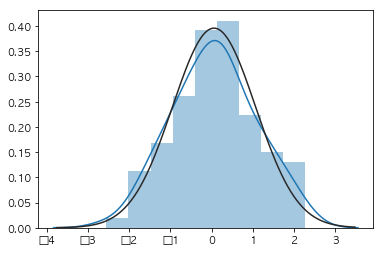

In [27]:
sns.distplot(x, kde=True, fit=sp.stats.norm)
plt.show()

- - -
### 3. QQ플롯  (Quantile-Quantile plot)
- 정규분포 여러 연속 확률 분포 중에서도 가장 유용하고 널리 쓰인다.
- 어떤 확률 변수의 분포가 정규 분포인지 아닌지를 확인하는 것은 정규분포 검정(nomality test)은 가장 중요한 통계적 분석 중 하나
- 정밀한 정규 분포 검정 사용하기 앞서서 시각적으로 간단하게 정규분포를 확인할 수 있는 QQ플롯을 사용가능하다.
- - -

- 샘플 데이터의 분포와 정규 분포의 형태를 비교할 수 있음
- 동일 분위수에 해당하는 정상 분포의 값과 주어진 분포의 값을 한 쌍으로 만들어 스캐터플롯(scatter plot)으로 그린 것

- 그리는 방법(샘플의 분위함수, 분위함수가 정규분포의 누적 확률 함수 값이 되는 표준정규분포의 값)
    - 대상 샘플 데이터를 크기에 따라 줄을 세운다.
    - 각 샘플 데이터의 분위함수 값, percent % 구한다. (통계 하위부터 따져서 작은 값이 10% 큰값이 90% 이렇게 분위함수 구한다.)
    - 각 샘플 데이터의 분위함수(%) 값이 정규 분포의 누적 확률 함수 값이 되는 표준 정규 분포의 값, 즉 분위수(quantile)를 구한다.
    - 샘플 데이터, 정규분포값을 하나의 쌍으로 생각해서 2차원 공간에 점으로 그린다.
    - 모든 샘플을 이전 4단계를 반복하며 QQ플롯을 그린다.
- - -
`sp.stats.probplot(샘플값, plot= )`

- 원래 플롯 그리는 애 아니라서 인수에 저렇게 plt줘야함
- plot 값에 matplotlib.pylab모듈 객체 / Axes클래스 객체 넣어줘야 차트 그린다.

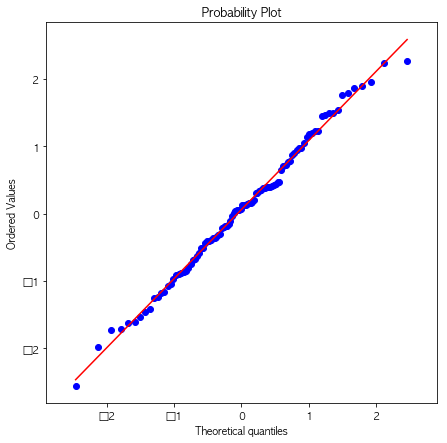

In [36]:
np.random.seed(0)
x = np.random.randn(100) # 가우시안 분포로 랜덤 값 뽑아서 그린다.
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

- - -
정규 분포를 따르지 않는 데이터 샘플을 QQ플롯으로 그리게 되면 직선이 아닌 휘어진 형태로 나타난다.

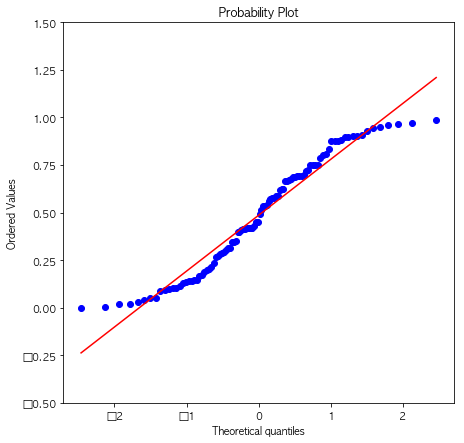

In [42]:
np.random.seed(1)
x = np.random.rand(100) # 균등분포로 x 그려서 QQ플롯 그린다.
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

- - -
### 4. 중심 극한 정리(Central Limit Theorem)

- 여러 확률 변수의 합이 정규 분포와 비슷한 분포를 이루는 현상
- 실생활의 여러 현상들이 정규분포로 모형화 가능한 이유가 바로 중심 극한 정리 때문

In [48]:
%%latex
$\overline{x}_{n}=\frac{1}{n}(x_{1}+...+x_{n})$

<IPython.core.display.Latex object>

In [51]:
%%latex
$z=\frac{\overline{x}_{n}-\mu}{\frac{\sigma}{\sqrt{n}}}$

<IPython.core.display.Latex object>

In [55]:
%%latex
$z=\frac{\overline{x}_{n}-\mu}{\frac{\sigma}{\sqrt{n}}} \rightarrow N(x;0,1)$

<IPython.core.display.Latex object>

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


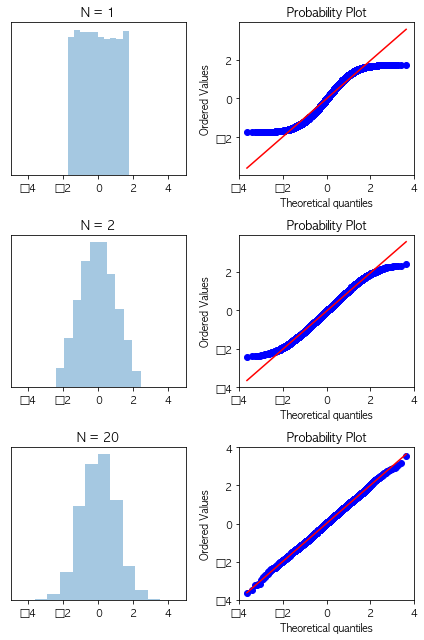

In [56]:
# 시뮬레이션 
np.random.seed(0)
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6, 9))
for i, N in enumerate([1, 2, 20]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)

plt.tight_layout()
plt.show()